In [1]:
from __future__ import absolute_import, division, print_function
from matplotlib.font_manager import _rebuild; _rebuild()
#Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as spio
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve
from yellowbrick.model_selection import LearningCurve
import random
import re
import string
import sys

Using TensorFlow backend.


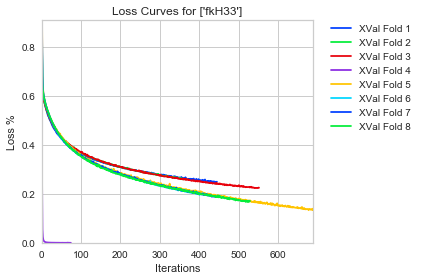

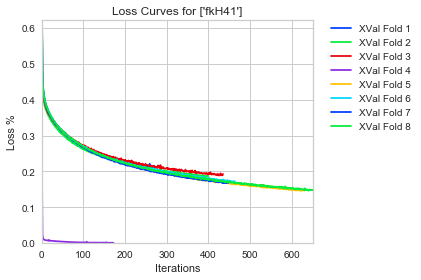

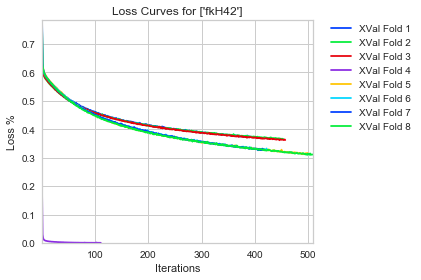

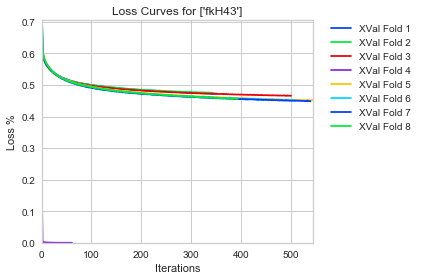

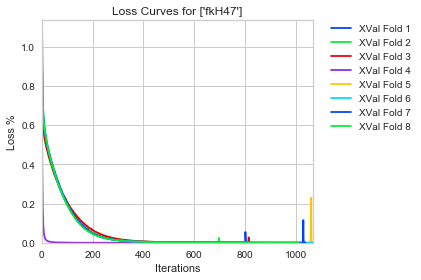

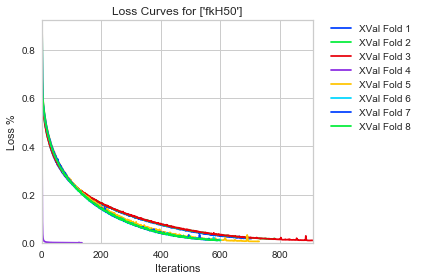

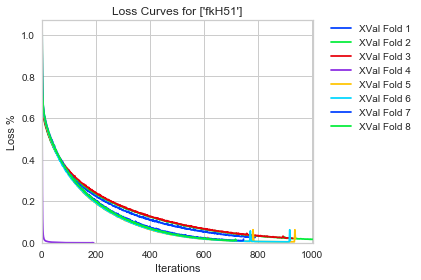

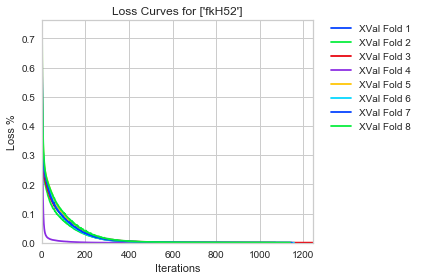

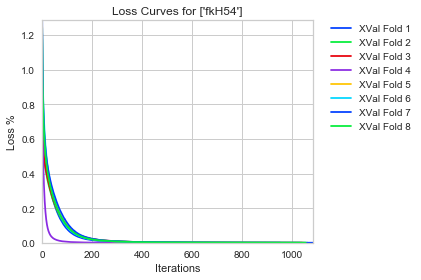

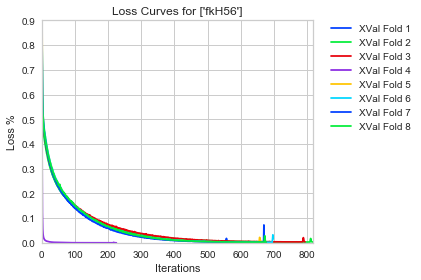

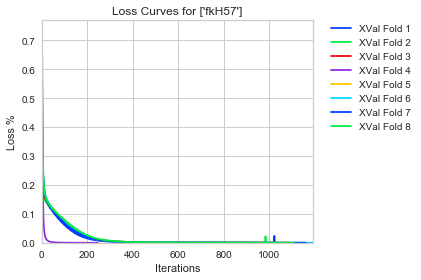

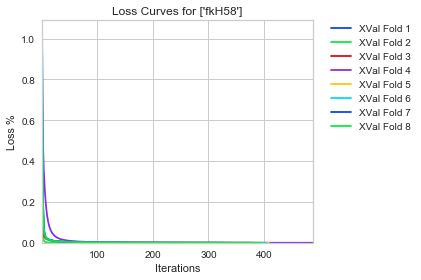

<Figure size 432x288 with 0 Axes>

In [20]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def clean_file(animal_id):
    infile = "log_{}.txt".format(animal_id)
    outfile = "cleaned_{}.txt".format(animal_id)
    delete_list = ["Iteration", "loss = "]
    fin = open(infile)
    fout = open(outfile, "w+")
    for line in fin:
        for word in delete_list:
            line = line.replace(word, "")
        fout.write(line)
    fin.close()
    fout.close()
    return outfile

def split_file(filename):
    split_line = "Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping."
    with open(filename, mode="r") as bigfile:
        reader = bigfile.read()
    for i, part in enumerate(reader.split(split_line)):
        i = i + 1
        with open("{}_{}".format(filename, i), mode="w") as newfile:
            newfile.write(part)

# Plot loss curve aka cost function.
def plot_loss_curve(animal_id):
    # Initialize the figure
    plt.style.use('seaborn-bright')
    # create a color palette
    palette = plt.get_cmap('spring')
    # plot all folds
    plt.xlabel("Iterations")
    plt.ylabel("Loss %")
    plt.title("Loss Curves for {}".format(animal_id))
    ctr = 0
    for i in range(1,9):
        filename = "cleaned_{}.txt_{}".format(animal_id, i)
        headers = ['Epoch','Loss']
        df = pd.read_csv(filename, names=headers, skiprows=1)
        x = df['Epoch']
        y = df['Loss']
        plt.plot(x, y, label="XVal Fold {}".format(i))
    # Save plot.
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0.)
    plt.margins(0)
    plt.tight_layout()
    plt.show()
    plt.savefig("Loss_{}.png".format(animal_id), dpi=600)

# Animal IDs for single-animal MLPClassifiers.
ids = ["['fkH33']","['fkH41']","['fkH42']","['fkH43']","['fkH47']","['fkH50']","['fkH51']","['fkH52']","['fkH54']","['fkH56']","['fkH57']","['fkH58']",]

# Clean log file and split each cross-validation fold into its own file.
for id in ids:
    clean_file_name = clean_file(id)
    split_file(clean_file_name)
    plot_loss_curve(id)
